In [37]:
#GIVEN A RED WINE DATASET PREDICT THE QUALITY OF WINE

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df_initial = pd.read_csv('winedata.csv')

In [40]:
df_initial.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
df_initial.shape

(1599, 12)

In [42]:
display(df_initial.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [43]:
#Check for Null values
df_initial.isnull().sum(axis = 0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [44]:
#Check for duplicate values
print(df_initial.duplicated().sum())

240


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


[Text(0.5, 1.0, 'target quality')]

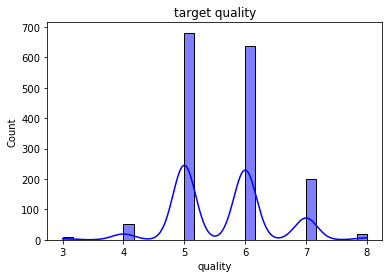

In [45]:
#Medium Quality wines are much more i.e concentrated on 5 and 6
#Due to high concentration of values on  5 and 6 We will divide the dataset into bad quality (<=5) and good quality(>=6) for our prediction
sns.histplot(data=df_initial, x="quality", kde=True, color='blue').set(title="target quality")

In [46]:
#Outlier detection using box plot
def find_outliers(df, features, alpha=0.05):
    for feature in features:
        fig, ax = plt.subplots(figsize=(16,3))
        sns.boxplot(data=df, x=feature)
        plt.show()

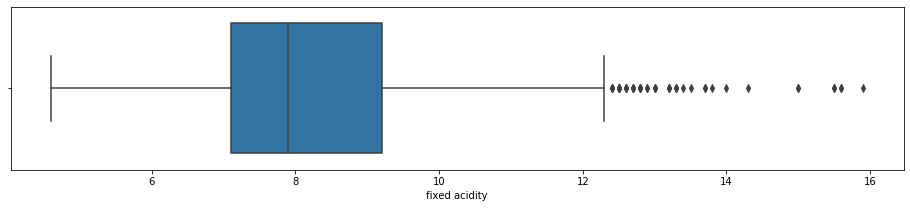

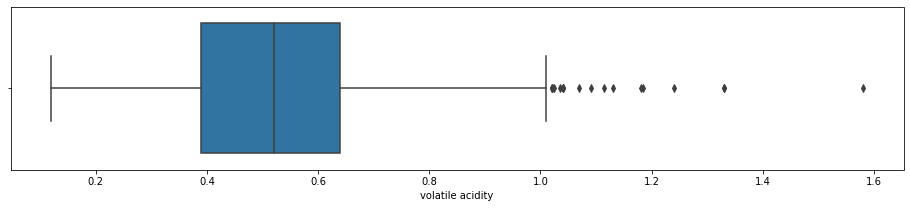

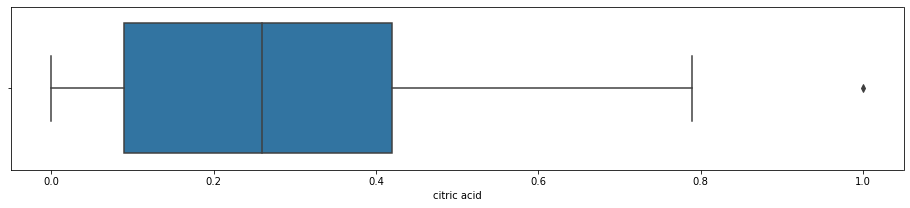

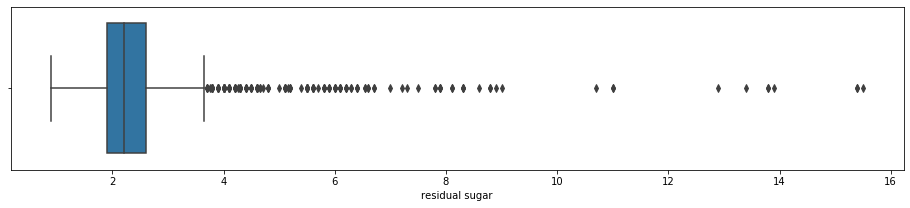

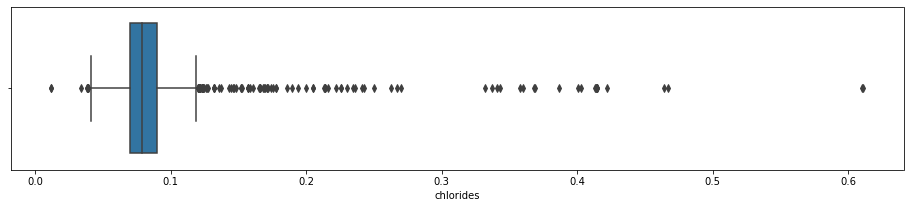

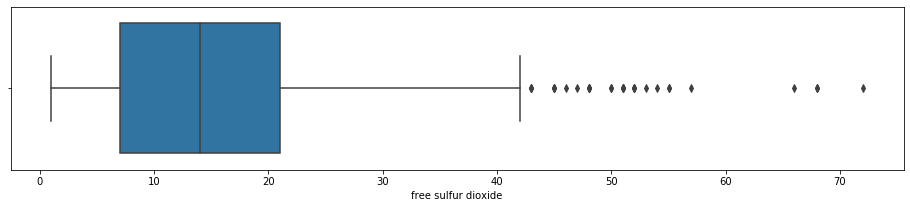

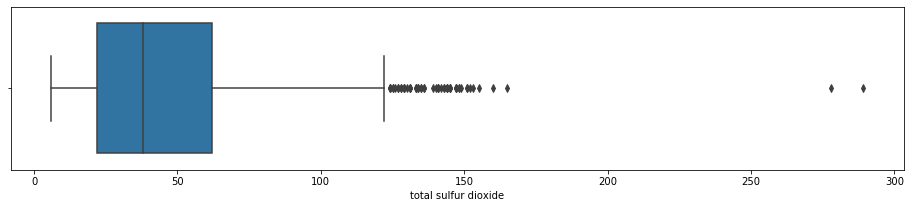

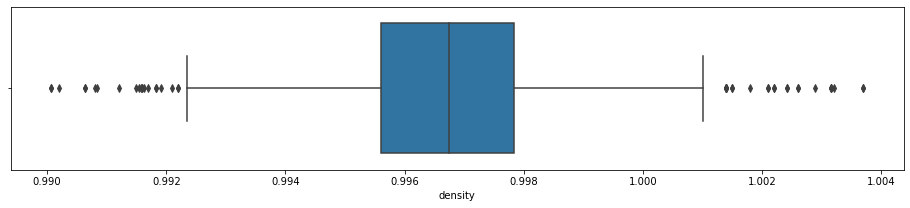

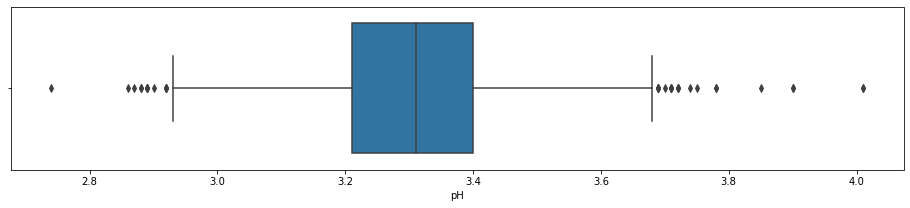

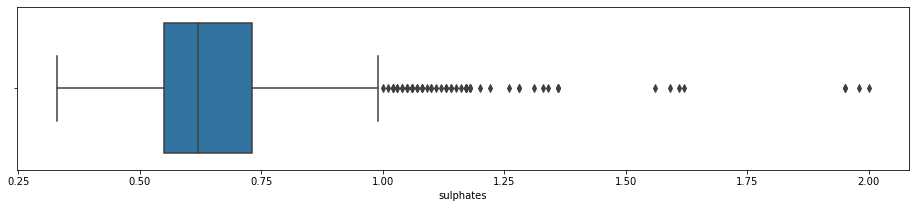

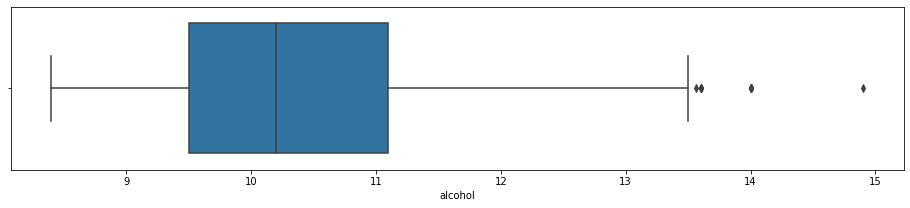

In [47]:
#Feature variables
features = ['fixed acidity', 'volatile acidity', 'citric acid', 
            'residual sugar', 'chlorides', 'free sulfur dioxide', 
            'total sulfur dioxide', 'density', 'pH', 
            'sulphates', 'alcohol']

#Target variable
target = 'quality'

find_outliers(df_initial, features)
#The following figure shows every feature has outliers

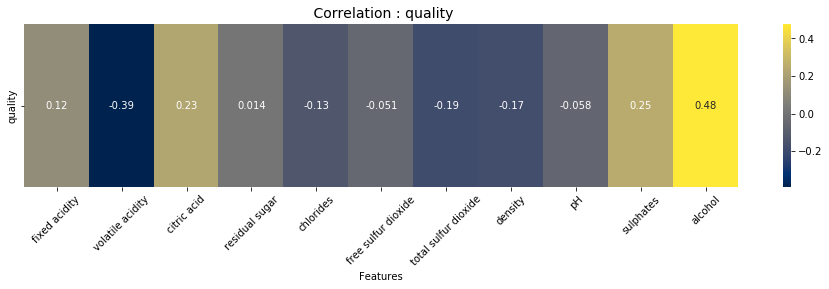

In [48]:
#Finding impact of each feature on quality
def features_impact(df, target):
    fig, ax = plt.subplots(figsize=(16,3))
    # HeatMap
    data = df.corr().loc[[target],:].drop(target, axis=1)
    sns.heatmap(data=data, cmap='cividis', annot=True, ax=ax)
    ax.set_title(f' Correlation : {target}', fontsize=14)
    ax.set_xlabel(f'Features')
    ax.tick_params(axis='x', labelrotation=45)
    plt.show()

features_impact(df_initial,target)
#alcohol->stringest positive correlation i.e.
#more alcohol more is the quality
#volatile acidity->strongest negative correlation i.e.
#the less the volatile acidity the more is the quality

In [49]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [50]:
def logistic_regression(df, features, target):
    
    X = df[features]
    y = np.vectorize(lambda y: 0 if y <= 5 else 1)(df[target])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_score = model.decision_function(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)

    print("Logistic Regression Accuracy: {:.2f}%".format(accuracy*100))
        

logistic_regression(df_initial, features, target)

Logistic Regression Accuracy: 74.06%


In [51]:
def decision_tree(df, features, target):
    X = df[features]
    y = np.vectorize(lambda y: 0 if y <= 5 else 1)(df[target])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scoresDT = []
    for i in range(2,21):
        DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
        DTclassifier.fit(X_train, y_train)
        scoresDT.append(DTclassifier.score(X_test, y_test))
    
    accDTscore = max(scoresDT)
    print("Decision Tree Accuracy: {:.2f}%".format(accDTscore*100))

decision_tree(df_initial, features, target)

Decision Tree Accuracy: 73.44%


In [52]:
def xg_Boost(df, features, target):
    X = df[features]
    y = np.vectorize(lambda y: 0 if y <= 5 else 1)(df[target])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBClassifier(eval_metric='mlogloss')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("XG Boost Accuracy: %.2f%%" % (accuracy * 100.0))

xg_Boost(df_initial, features, target)

XG Boost Accuracy: 80.00%


In [53]:
#Original Model -> 
#Logistic Regression Accuracy: 74.06%
#Decision Tree Accuracy: 73.44%
#XG Boost Accuracy: 80.00%

In [54]:
dataset=df_initial.copy(deep=True)

In [55]:
#Handling outliers using Quantile based flooring and capping

def outliers_to_mode(df):
    for col in df.columns:
        if (df[col].dtype != 'object'): # data needs to be non-categorical
            tmp = df[col]
            q1 = tmp.quantile(.05)
            q3 = tmp.quantile(.95)
            df.loc[tmp < q1, col] = tmp.mode()[0]
            df.loc[tmp > q3, col] = tmp.mode()[0]
    return df

In [56]:
dataset = outliers_to_mode(dataset)

In [57]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.60,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


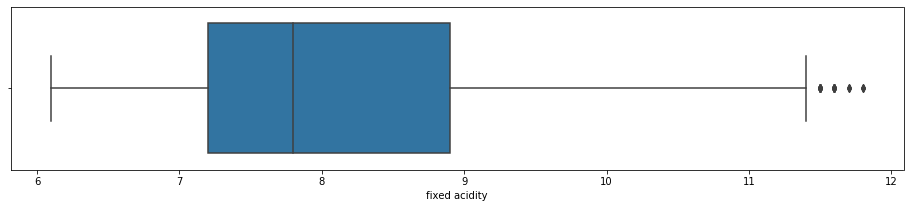

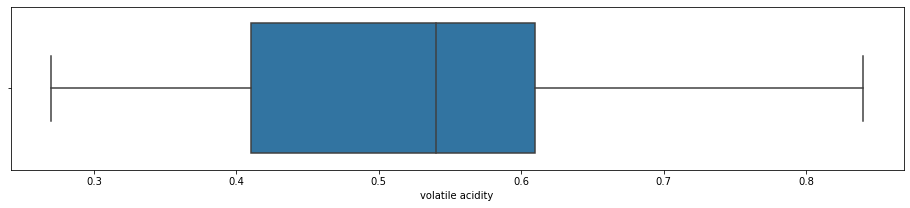

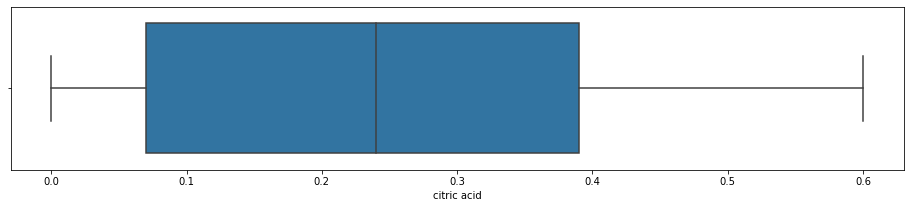

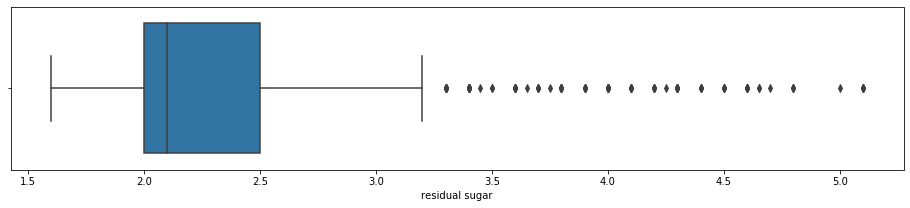

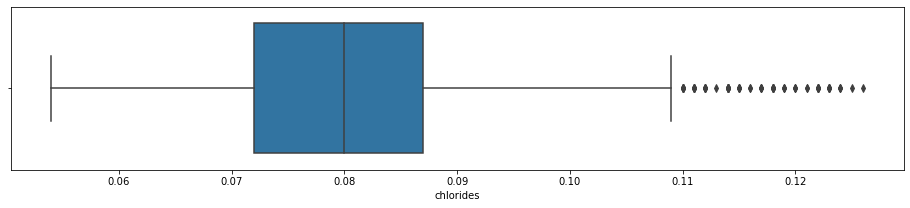

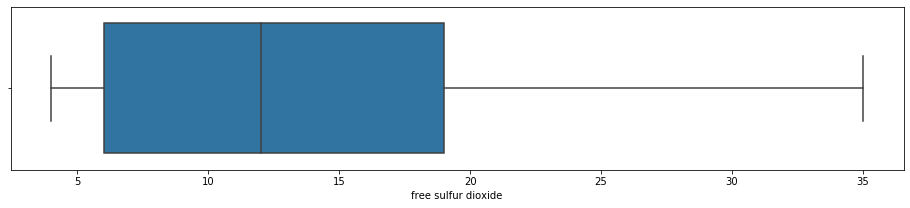

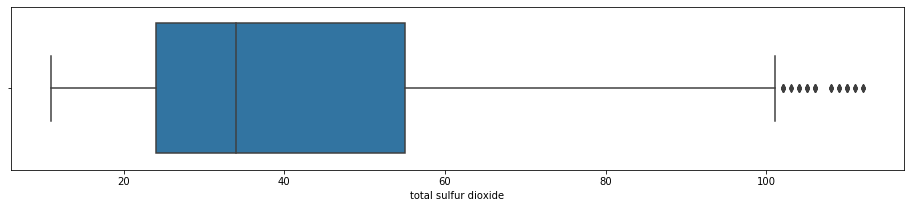

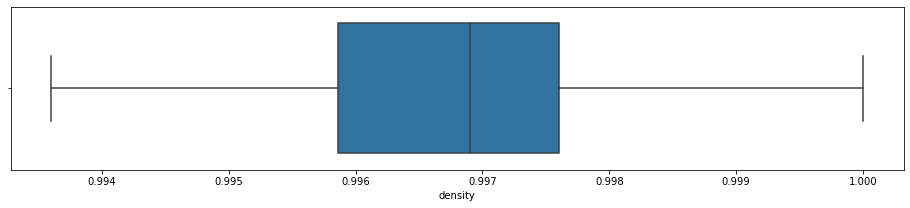

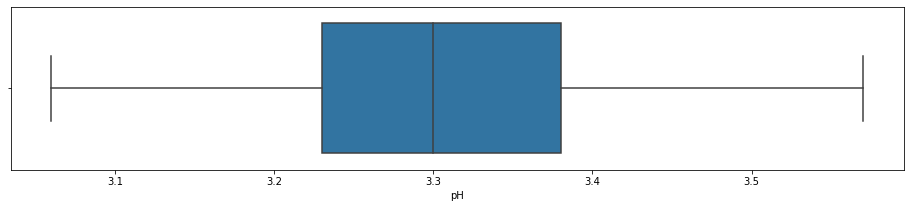

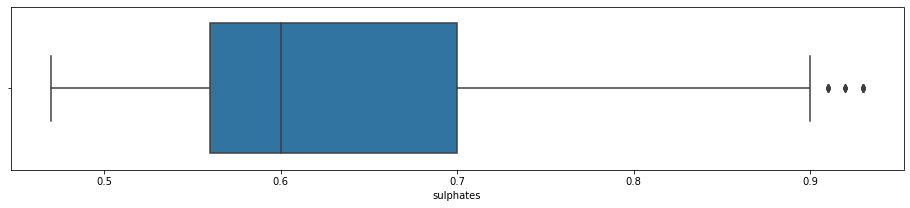

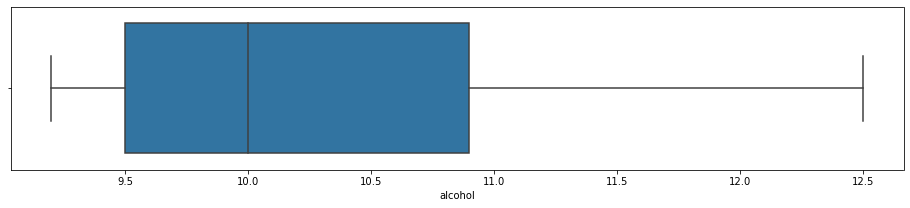

In [58]:
find_outliers(dataset, features)

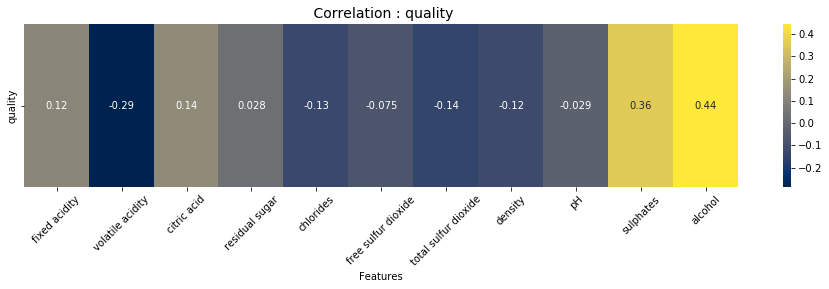

In [59]:
features_impact(dataset,target)

In [60]:
logistic_regression(dataset, features, target)

Logistic Regression Accuracy: 67.81%


In [61]:
decision_tree(dataset, features, target)

Decision Tree Accuracy: 66.25%


In [62]:
xg_Boost(dataset, features, target)

XG Boost Accuracy: 76.56%


In [64]:
#Original Model -> 
#Logistic Regression Accuracy: 74.06%
#Decision Tree Accuracy: 73.44%
#XG Boost Accuracy: 80.00%

#Outlier Handling Model ->
#Logistic Regression Accuracy: 67.81%
#Decision Tree Accuracy: 66.25%
#XG Boost Accuracy: 76.56%

Handling Outliers decreases our accuracy sharply hence it sugests that it creates more imbalance and hence handling them isn't such a good idea

In [65]:
#Dropping some features having another feature with same correlation with quality

In [66]:
df_reduced = df_initial.drop(['density', 'pH', 'sulphates',], axis=1)
df_reduced.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,9.4,5


In [67]:
features2 = ['fixed acidity', 'volatile acidity', 'residual sugar', 
            'chlorides', 'free sulfur dioxide','total sulfur dioxide', 
            'citric acid', 'alcohol']

In [68]:
logistic_regression(df_reduced, features2, target)

Logistic Regression Accuracy: 73.75%


In [69]:
decision_tree(df_reduced, features2, target)

Decision Tree Accuracy: 72.19%


In [70]:
xg_Boost(df_reduced, features2, target)

XG Boost Accuracy: 80.62%


In [ ]:
#Original Model -> 
#Logistic Regression Accuracy: 74.06%
#Decision Tree Accuracy: 73.44%
#XG Boost Accuracy: 80.00%

#Outlier Handling Model ->
#Logistic Regression Accuracy: 67.81%
#Decision Tree Accuracy: 66.25%
#XG Boost Accuracy: 76.56%

#Feature Dropped Model ->
#Logistic Regression Accuracy: 73.75%
#Decision Tree Accuracy: 72.19%
#XG Boost Accuracy: 80.62%

Dropping features decreases accuracy on Logistic Regression and Decision Tree but increases acuuracy on XG Boost

In [71]:
#Using maximum absolute scaling to normalize the features

df_max_scaled = df_initial.copy(deep=True)
  
# apply normalization 
for column in df_max_scaled.columns:
    if column != 'quality':
        df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()

df_max_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.465409,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872,5
1,0.490566,0.556962,0.00,0.167742,0.160393,0.347222,0.231834,0.993135,0.798005,0.340,0.657718,5
2,0.490566,0.481013,0.04,0.148387,0.150573,0.208333,0.186851,0.993335,0.812968,0.325,0.657718,5
3,0.704403,0.177215,0.56,0.122581,0.122750,0.236111,0.207612,0.994331,0.788030,0.290,0.657718,6
4,0.465409,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872,5


In [72]:
logistic_regression(df_max_scaled, features, target)

Logistic Regression Accuracy: 74.69%


In [73]:
decision_tree(df_max_scaled, features, target)

Decision Tree Accuracy: 73.44%


In [74]:
xg_Boost(df_max_scaled, features, target)

XG Boost Accuracy: 79.69%


In [75]:
#Original Model -> 
#Logistic Regression Accuracy: 74.06%
#Decision Tree Accuracy: 73.44%
#XG Boost Accuracy: 80.00%

#Outlier Handling Model ->
#Logistic Regression Accuracy: 67.81%
#Decision Tree Accuracy: 66.25%
#XG Boost Accuracy: 76.56%

#Feature Dropped Model ->
#Logistic Regression Accuracy: 73.75%
#Decision Tree Accuracy: 72.19%
#XG Boost Accuracy: 80.62%

#Maximum Absolute Scaling Model ->
#Logistic Regression Accuracy: 74.69%
#Decision Tree Accuracy: 73.44%
#XG Boost Accuracy: 79.69%

Maximum Absolute Scaling outperforms Original model on Logistic Regression and gives quite simillar performance on Decision Tree and XG Boost

In [76]:
#Using min max scaling to normalize the features

# copy the data
df_min_max_scaled = df_initial.copy(deep=True)

# apply normalization techniques
for column in df_min_max_scaled.columns:
    if column != 'quality':
        df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    

        
df_min_max_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


In [77]:
logistic_regression(df_min_max_scaled, features, target)

Logistic Regression Accuracy: 73.75%


In [78]:
decision_tree(df_min_max_scaled, features, target)

Decision Tree Accuracy: 73.75%


In [79]:
xg_Boost(df_min_max_scaled, features, target)

XG Boost Accuracy: 80.00%


In [80]:
#Original Model -> 
#Logistic Regression Accuracy: 74.06%
#Decision Tree Accuracy: 73.44%
#XG Boost Accuracy: 80.00%

#Outlier Handling Model ->
#Logistic Regression Accuracy: 67.81%
#Decision Tree Accuracy: 66.25%
#XG Boost Accuracy: 76.56%

#Feature Dropped Model ->
#Logistic Regression Accuracy: 73.75%
#Decision Tree Accuracy: 72.19%
#XG Boost Accuracy: 80.62%

#Maximum Absolute Scaling Model ->
#Logistic Regression Accuracy: 74.69%
#Decision Tree Accuracy: 73.44%
#XG Boost Accuracy: 79.69%

#Min Max scaling Model ->
#Logistic Regression Accuracy: 73.75%
#Decision Tree Accuracy: 73.75%
#XG Boost Accuracy: 80.00%

Min Max Scaling does not outperform Original model on Logistic Regression but outperforms slightly it on Decision Tree while performs similar on XG Boost

In [84]:
#Logistic Regression performs best on Maximum Absolute Scaling Model with 74.69 % accuracy 
#Decision Tree performs best on Min Max Scaling Model with 73.75 % accuracy
#XG Boost performs best on Feature Drop Model with 80.62 % accuracy which is also the best accuracy acheived on all models